In [1]:
import pandas as pd

from dpks.quant_matrix import QuantMatrix
from dpks.differential_testing import DifferentialTest

quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv",
)

/home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[WARNING] /home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)



In [2]:
quantified_data = (
    quant_matrix.filter().normalize(
        method="mean",
        log_transform=True,
        use_rt_sliding_window_filter=True,
        minimum_data_points=100,
        stride=5,
        use_overlapping_windows=True,
        rt_unit="minutes",
    ).scale("minmax")
    # .quantify(method="top_n", top_n=1)
)
quantified_data.to_df()

[WARNING] /home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/dpks/scaling.py:91: RuntimeWarning: invalid value encountered in divide
  return np.array((X - mins[:, None]) / (maxes[:, None] - mins[:, None]))



,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,AAS_P2009_167,AAS_P2009_169,AAS_P2009_176,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,TGTLTTSETAHNM(UniMod:35)K,3,0,sp|P32324|EF2_YEAST,1648.580,0.000000,0.0,NaN,0.331401,NaN,...,0.086736,NaN,0.129059,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,THNDIIHNENM(UniMod:35)R,3,0,sp|P26040|EZRI_MOUSE,1779.425,0.008803,0.0,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSVTYTEHAK,2,0,sp|P02309|H4_YEAST,1830.600,0.000261,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,IHMGNC(UniMod:4)AENTAK,3,0,sp|Q8QZT1|THIL_MOUSE,1842.815,0.003430,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDC(UniMod:4)GDYSDER,2,0,sp|A2ARV4|LRP2_MOUSE,1895.030,0.004436,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,AMDFDRDVLSALAEVEQLSK,3,0,sp|P02469|LAMB1_MOUSE,7300.590,0.004138,0.0,NaN,NaN,NaN,...,0.767779,NaN,0.862130,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
13179,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR,3,0,sp|Q9Z1W8|AT12A_MOUSE,7308.245,0.000000,0.0,0.000000,1.000000,NaN,...,0.713388,0.246445,0.795802,0.309464,0.772509,0.286028,0.646827,0.808107,0.205616,0.413769
13180,SNLVGMGVIPLEYLPGETADSLGLTGR,3,0,sp|P28271|ACOHC_MOUSE,7311.770,0.003138,0.0,NaN,NaN,NaN,...,NaN,0.116911,0.507332,0.000000,0.723514,0.002494,NaN,0.560133,0.103130,0.218192
13181,LFSGEDVLYEGDSIVYPVFINEAAYYEK,3,0,sp|Q91XE4|ACY3_MOUSE,7315.150,0.009142,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
compared_data = quantified_data.compare(
    method="anova",
    comparisons=(4, 6),
    min_samples_per_group=2,
    level="precursor",
    multiple_testing_correction_method="fdr_tsbh",
)

compared_data.to_df()

,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,PrecursorId,DEScore4-6,Group4Mean,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,TGTLTTSETAHNM(UniMod:35)K,3,0,sp|P32324|EF2_YEAST,1648.580,0.000000,0.0,TGTLTTSETAHNM(UniMod:35)K_3,NaN,NaN,...,0.086736,NaN,0.129059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THNDIIHNENM(UniMod:35)R,3,0,sp|P26040|EZRI_MOUSE,1779.425,0.008803,0.0,THNDIIHNENM(UniMod:35)R_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSVTYTEHAK,2,0,sp|P02309|H4_YEAST,1830.600,0.000261,0.0,DSVTYTEHAK_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IHMGNC(UniMod:4)AENTAK,3,0,sp|Q8QZT1|THIL_MOUSE,1842.815,0.003430,0.0,IHMGNC(UniMod:4)AENTAK_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDC(UniMod:4)GDYSDER,2,0,sp|A2ARV4|LRP2_MOUSE,1895.030,0.004436,0.0,NDC(UniMod:4)GDYSDER_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,AMDFDRDVLSALAEVEQLSK,3,0,sp|P02469|LAMB1_MOUSE,7300.590,0.004138,0.0,AMDFDRDVLSALAEVEQLSK_3,NaN,NaN,...,0.767779,NaN,0.862130,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
13179,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR,3,0,sp|Q9Z1W8|AT12A_MOUSE,7308.245,0.000000,0.0,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR_3,0.105954,0.604605,...,0.713388,0.246445,0.795802,0.309464,0.772509,0.286028,0.646827,0.808107,0.205616,0.413769
13180,SNLVGMGVIPLEYLPGETADSLGLTGR,3,0,sp|P28271|ACOHC_MOUSE,7311.770,0.003138,0.0,SNLVGMGVIPLEYLPGETADSLGLTGR_3,0.124316,0.322038,...,NaN,0.116911,0.507332,NaN,0.723514,0.002494,NaN,0.560133,0.103130,0.218192
13181,LFSGEDVLYEGDSIVYPVFINEAAYYEK,3,0,sp|Q91XE4|ACY3_MOUSE,7315.150,0.009142,0.0,LFSGEDVLYEGDSIVYPVFINEAAYYEK_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Log2FoldChange4-6', ylabel='-Log10CorrectedPValue4-6'>

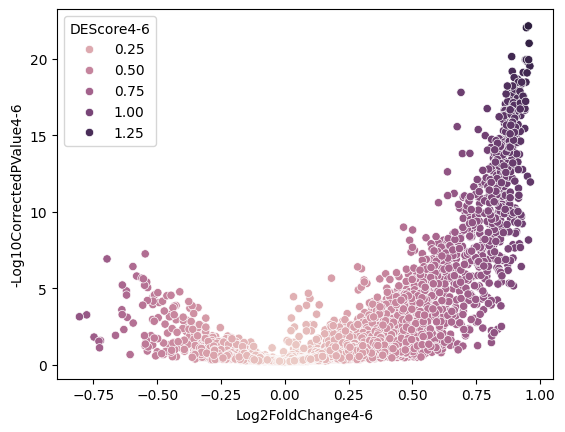

In [5]:
import seaborn as sns
import numpy as np



sns.scatterplot(
    data=compared_data.row_annotations,
    x="Log2FoldChange4-6",
    y="-Log10CorrectedPValue4-6",
    hue="DEScore4-6",
)

In [6]:
compared_data.row_annotations["Species"] = np.where(
    compared_data.row_annotations["Protein"].str.contains("MOUSE"),
    "MOUSE",
    np.where(
        compared_data.row_annotations["Protein"].str.contains("YEAST"),
        "YEAST",
        np.where(
            compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE"
        ),
    ),
)

<Axes: xlabel='Group6Mean', ylabel='Log2FoldChange4-6'>

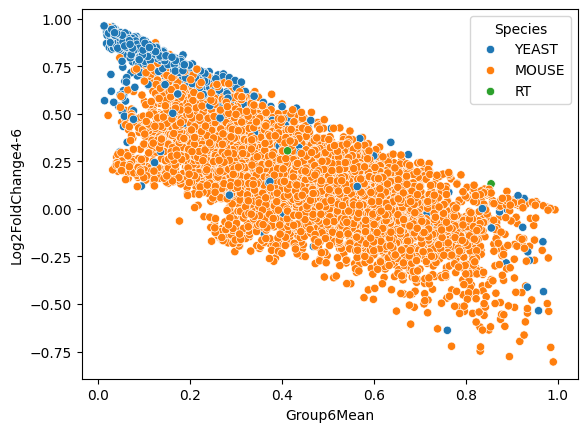

In [7]:
sns.scatterplot(
    data=compared_data.row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species",
)

In [8]:
cutoffs = np.linspace(0.0, 1.0, num=10000)

In [9]:
precision_roc_data = []

for cutoff in cutoffs[1:]:
    yeast_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] <= cutoff)
        & (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    yeast_fn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] > cutoff)
        & (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    mouse_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] <= cutoff)
        & (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    mouse_tn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] > cutoff)
        & (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    recall = yeast_ids / (yeast_ids + yeast_fn)

    precision = yeast_ids / (yeast_ids + mouse_ids)
    fpr = mouse_ids / (mouse_ids + mouse_tn)

    precision_roc_data.append({"recall": recall, "precision": precision, "fpr": fpr})

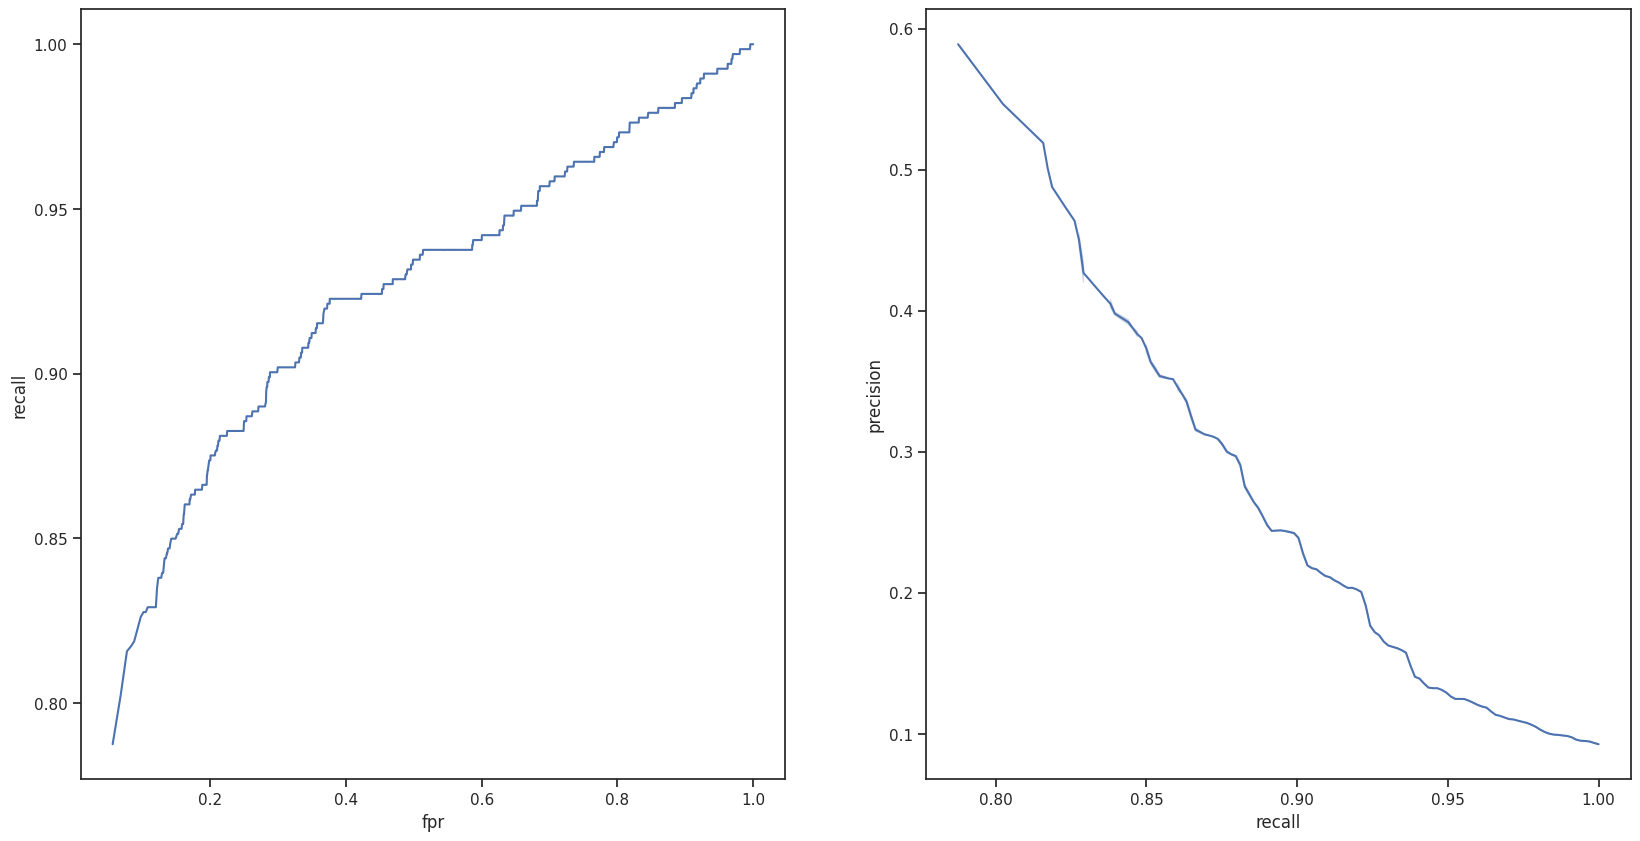

In [10]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

sns.lineplot(
    data=pd.DataFrame(precision_roc_data),
    x="fpr",
    y="recall",
    ax=ax1,
)

sns.lineplot(data=pd.DataFrame(precision_roc_data), x="recall", y="precision", ax=ax2)
fig.figure.set_size_inches(20, 10)

## Paired t-test

In [11]:
import numpy as np
from scipy import stats
import pandas as pd

from dpks.quant_matrix import QuantMatrix


rng = np.random.default_rng()

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs3 = stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs4 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

qm = pd.DataFrame(
    {"Protein": range(len(rvs1)), "s1": rvs1, "s2": rvs2, "s3": rvs3, "s4": rvs4}
)
design = pd.DataFrame(
    {
        "sample": ["s1", "s2", "s3", "s4"],
        "group": [1, 2, 2, 1],
        "pair": ["s2", "s1", "s4", "s3"],
    }
)

quant_matrix = QuantMatrix(qm, design)
compared_data = quant_matrix.compare(
    method="ttest_paired",
    comparisons=(1, 2),
    min_samples_per_group=1,
    level="Protein",
    multiple_testing_correction_method="fdr_tsbh",
)
compared_data.to_df()

,Protein,DEScore1-2,Group1Mean,Group2Mean,Group1Stdev,Group2Stdev,Log2FoldChange1-2,PValue1-2,Group1RepCounts,Group2RepCounts,CorrectedPValue1-2,-Log10CorrectedPValue1-2,s1,s2,s3,s4
0,0,0.037307,0.829793,-0.142632,2.089408,4.633015,0.972425,0.908545,2,2,0.998401,0.000695,2.919201,-4.775647,4.490382,-1.259615
1,1,0.000471,4.224202,4.236932,6.917810,1.141545,-0.012730,0.998994,2,2,0.999255,0.000324,-2.693608,5.378477,3.095387,11.142012
2,2,0.535076,25.015730,9.855006,1.926264,16.981184,15.160724,0.497771,2,2,0.962786,0.016470,23.089466,-7.126177,26.836190,26.941995
3,3,0.423421,9.085078,2.419234,2.967725,1.621688,6.665843,0.126847,2,2,0.962786,0.016470,12.052802,4.040923,0.797546,6.117353
4,4,0.124171,3.192634,6.641649,4.545146,6.548705,-3.449015,0.808109,2,2,0.997027,0.001293,7.737780,0.092944,13.190354,-1.352512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.745226,3.375162,22.226823,1.535810,2.019416,-18.851661,0.118666,2,2,0.962786,0.016470,4.910972,20.207407,24.246239,1.839352
496,496,0.392946,1.577146,12.794395,11.731039,6.451030,-11.217249,0.648088,2,2,0.975582,0.010736,-10.153893,19.245424,6.343365,13.308185
497,497,0.006842,11.660116,11.854523,1.350249,13.374390,-0.194407,0.991595,2,2,0.999255,0.000324,13.010365,-1.519868,25.228913,10.309867
498,498,0.381311,17.224568,6.427220,7.158482,7.940804,10.797348,0.604798,2,2,0.975481,0.010781,24.383049,-1.513584,14.368024,10.066086
